In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Hospital visits by state

In [3]:
er_hospital_states = pd.read_excel('DOSE_dx_Dashboard_011325.xlsx',sheet_name='Jurisdiction Counts & Rates')
er_hospital_states

,jurisdiction,month,year,time_frame,dataset,count_alldrug,count_opioid,count_fentanyl,count_heroin,count_stimulant,...,count_benzodiazepine,population,rate_alldrug,rate_opioid,rate_fentanyl,rate_heroin,rate_stimulant,rate_cocaine,rate_methamphetamine,rate_benzodiazepine
0,AK,all,2018,annual,ED,792,230,NaN,135,48,...,44,736624,107.5,31.2,NaN,18.3,6.5,suppressed,NaN,6
1,AK,all,2018,annual,HOSP,335,107,NaN,27,53,...,26,736624,45.5,14.5,NaN,3.7,7.2,suppressed,NaN,3.5
2,AK,all,2019,annual,ED,768,249,NaN,126,44,...,27,733603,104.7,33.9,NaN,17.2,6,suppressed,NaN,3.7
3,AK,all,2019,annual,HOSP,346,112,NaN,25,70,...,22,733603,47.2,15.3,NaN,3.4,9.5,suppressed,NaN,3
4,AK,all,2020,annual,ED,814,320,NaN,131,50,...,28,732964,111.1,43.7,NaN,17.9,6.8,suppressed,NaN,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,WI,12,2021,monthly,HOSP,153,70,11,19,27,...,14,5879978,2.6,1.2,suppressed,suppressed,0.5,suppressed,NaN,suppressed
5105,WI,12,2022,monthly,ED,562,227,13,95,20,...,37,5890543,9.5,3.9,suppressed,1.6,0.3,suppressed,suppressed,0.6
5106,WI,12,2022,monthly,HOSP,158,59,16,17,27,...,11,5890543,2.7,1,suppressed,suppressed,0.5,0.4,suppressed,suppressed
5107,WI,12,2023,monthly,ED,481,147,16,36,26,...,10,5910955,8.1,2.5,suppressed,0.6,0.4,suppressed,suppressed,suppressed


In [4]:
er_hospital_states['count_fentanyl'] = pd.to_numeric(er_hospital_states['count_fentanyl'], errors = 'coerce')
er_hospital_states['count_cocaine'] = pd.to_numeric(er_hospital_states['count_cocaine'], errors = 'coerce')

# How many annual inpatient hospitalizations vs emergency room? 

## Count ODs of per state from 2018 - 2023

### Emergency Dept nonfatal ODs 

In [8]:
yearly2018_2023ed = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['dataset']=='HOSP']
    .groupby('jurisdiction')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
yearly2018_2023ed

,jurisdiction,count_fentanyl,count_cocaine
0,AK,99.0,81.0
1,AZ,2376.0,876.0
2,CA,7477.0,7897.0
3,CO,747.0,912.0
4,DC,65.0,736.0
5,DE,357.0,591.0
6,FL,4386.0,14312.0
7,GA,1140.0,5752.0
8,HI,11.0,112.0
9,IA,45.0,136.0


### Inpatient Hospitalizations nonfatal ODs 

In [10]:
yearly2018_2023hosp = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['dataset']=='HOSP']
    .groupby('jurisdiction')[['count_fentanyl','count_cocaine']].sum().reset_index()
    
)
yearly2018_2023hosp

,jurisdiction,count_fentanyl,count_cocaine
0,AK,99.0,81.0
1,AZ,2376.0,876.0
2,CA,7477.0,7897.0
3,CO,747.0,912.0
4,DC,65.0,736.0
5,DE,357.0,591.0
6,FL,4386.0,14312.0
7,GA,1140.0,5752.0
8,HI,11.0,112.0
9,IA,45.0,136.0


(0.0, 20000.0)

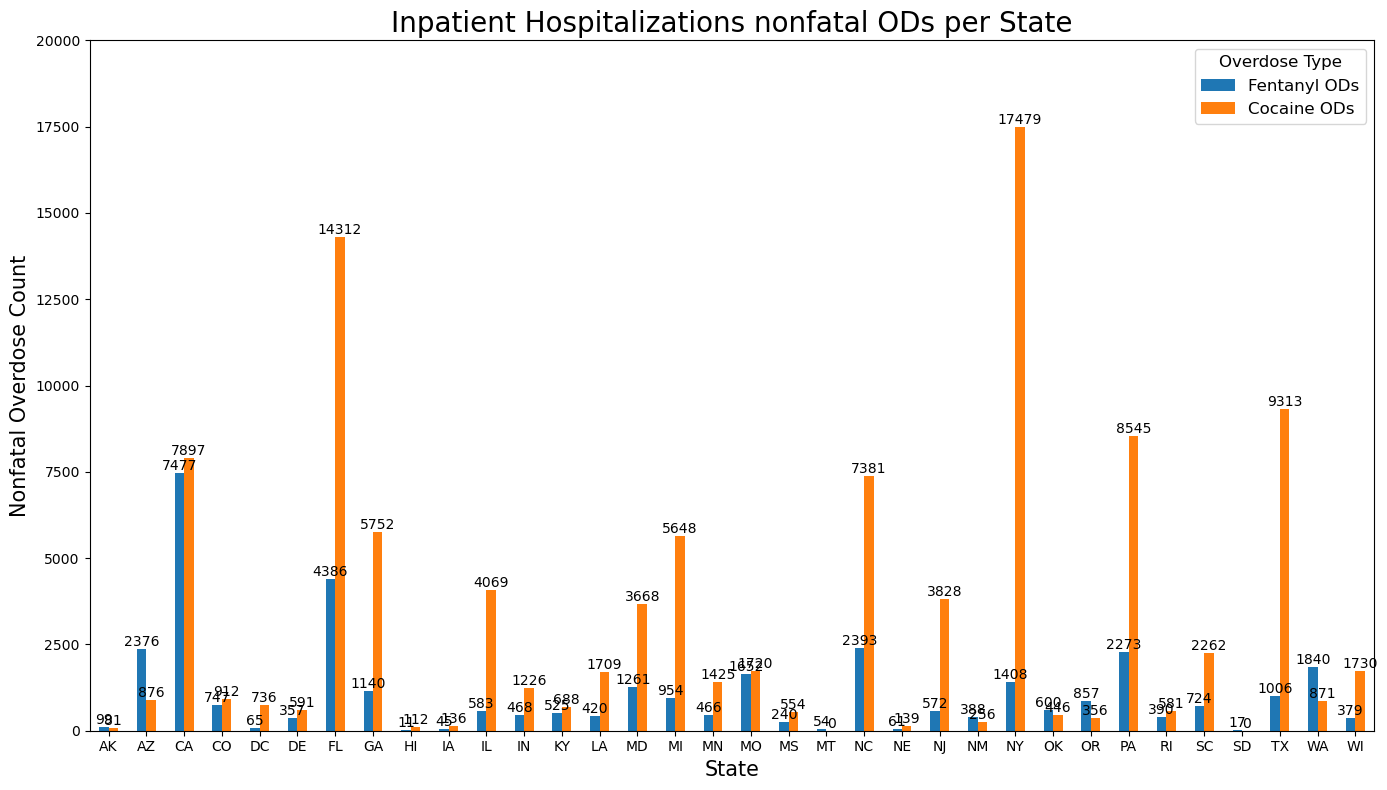

In [11]:

ax= yearly2018_2023hosp.plot(x='jurisdiction',y=['count_fentanyl','count_cocaine'], kind='bar',figsize=(14, 8))

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Inpatient Hospitalizations nonfatal ODs per State', fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Nonfatal Overdose Count',fontsize=15)
plt.xticks(rotation= 0)
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)
plt.tight_layout()

plt.ylim(bottom=0, top=20000)

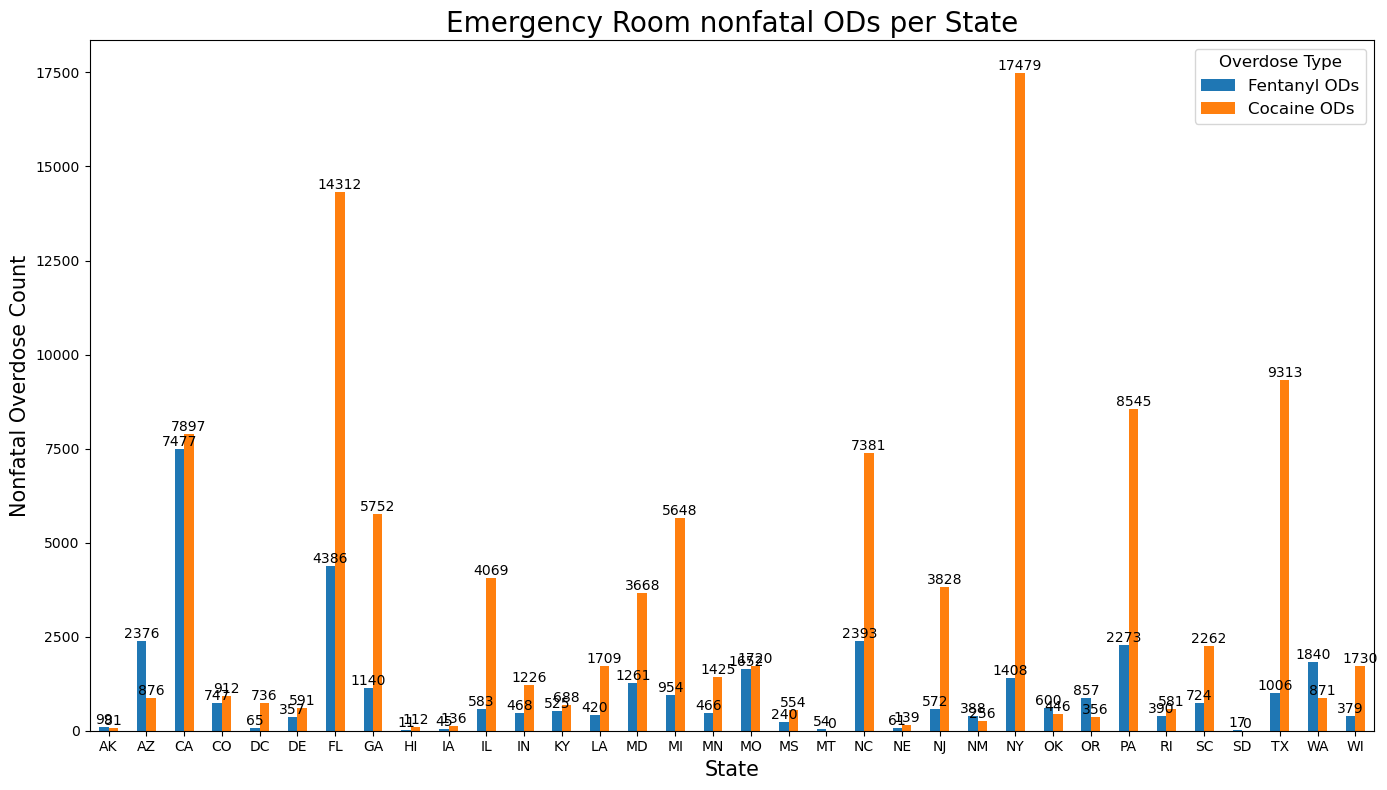

In [12]:

ax= yearly2018_2023ed.plot(x='jurisdiction',y=['count_fentanyl','count_cocaine'], kind='bar',figsize=(14, 8))

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.title('Emergency Room nonfatal ODs per State', fontsize=20)
plt.xlabel('State',fontsize=15)
plt.ylabel('Nonfatal Overdose Count',fontsize=15)
plt.xticks(rotation= 0)
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)
plt.tight_layout()

#plt.ylim(bottom=0, top=36000)

# Comparing Emergency Dept Vs Hospitalizations

## Cocaine OD Visits

In [38]:
cocaine_visits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .groupby(['jurisdiction', 'dataset'])['count_cocaine'].sum().reset_index()
    
)
cocaine_visits_count

,jurisdiction,dataset,count_cocaine
0,AK,ED,0.0
1,AK,HOSP,81.0
2,AZ,ED,621.0
3,AZ,HOSP,1610.0
4,CA,ED,9952.0
...,...,...,...
59,TX,ED,5842.0
60,TX,HOSP,18626.0
61,WA,HOSP,1505.0
62,WI,ED,980.0


Text(0.5, 1.0, 'Number of Cocaine Vists per State')

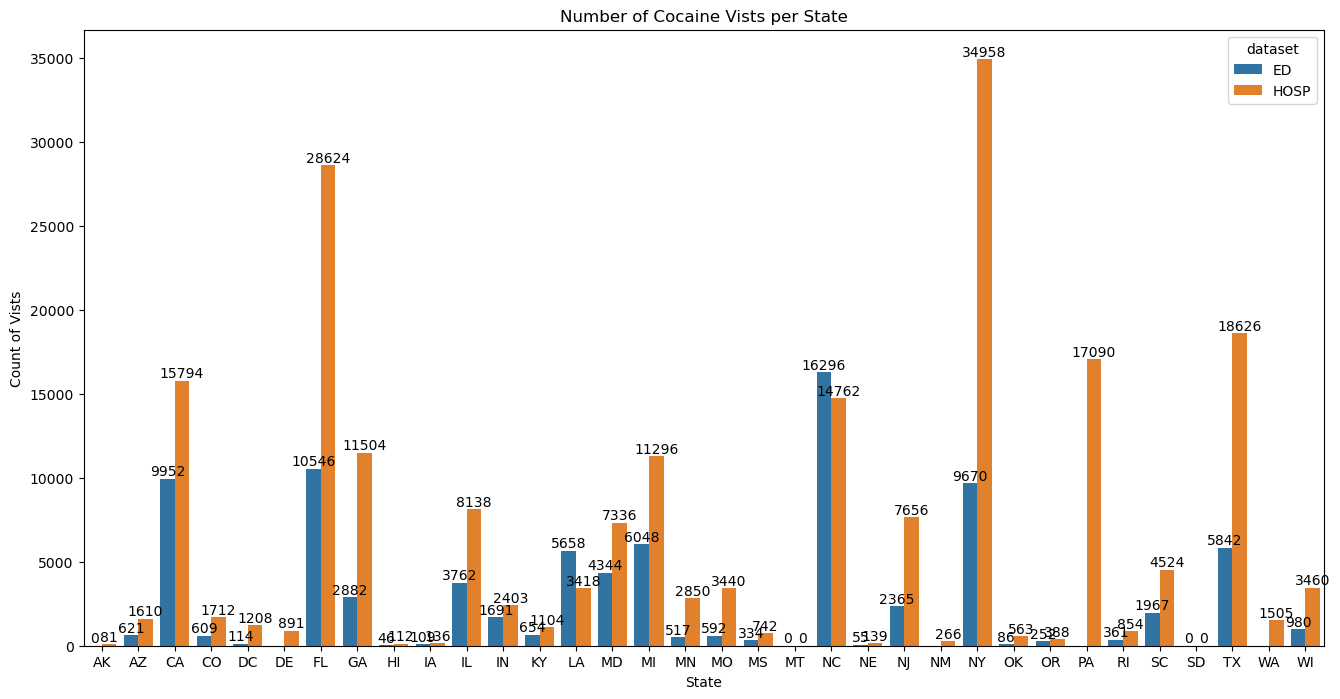

In [75]:
plt.figure(figsize=(16, 8))

ax= sns.barplot(x='jurisdiction', y= 'count_cocaine', hue='dataset', data= cocaine_count)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xlabel('State')
plt.ylabel('Count of Vists')
plt.title('Number of Cocaine Vists per State')

## Fentanyl OD visits

In [58]:
fentanyl_visits_count = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .groupby(['jurisdiction', 'dataset'])['count_fentanyl'].sum().reset_index()
    
)
fentanyl_visits_count



,jurisdiction,dataset,count_fentanyl
0,AK,ED,451.0
1,AK,HOSP,133.0
2,AZ,ED,9842.0
3,AZ,HOSP,4865.0
4,CA,ED,41445.0
...,...,...,...
59,TX,ED,3934.0
60,TX,HOSP,1954.0
61,WA,HOSP,3640.0
62,WI,ED,670.0


Text(0.5, 1.0, 'Number of Fentanyl Vists per State')

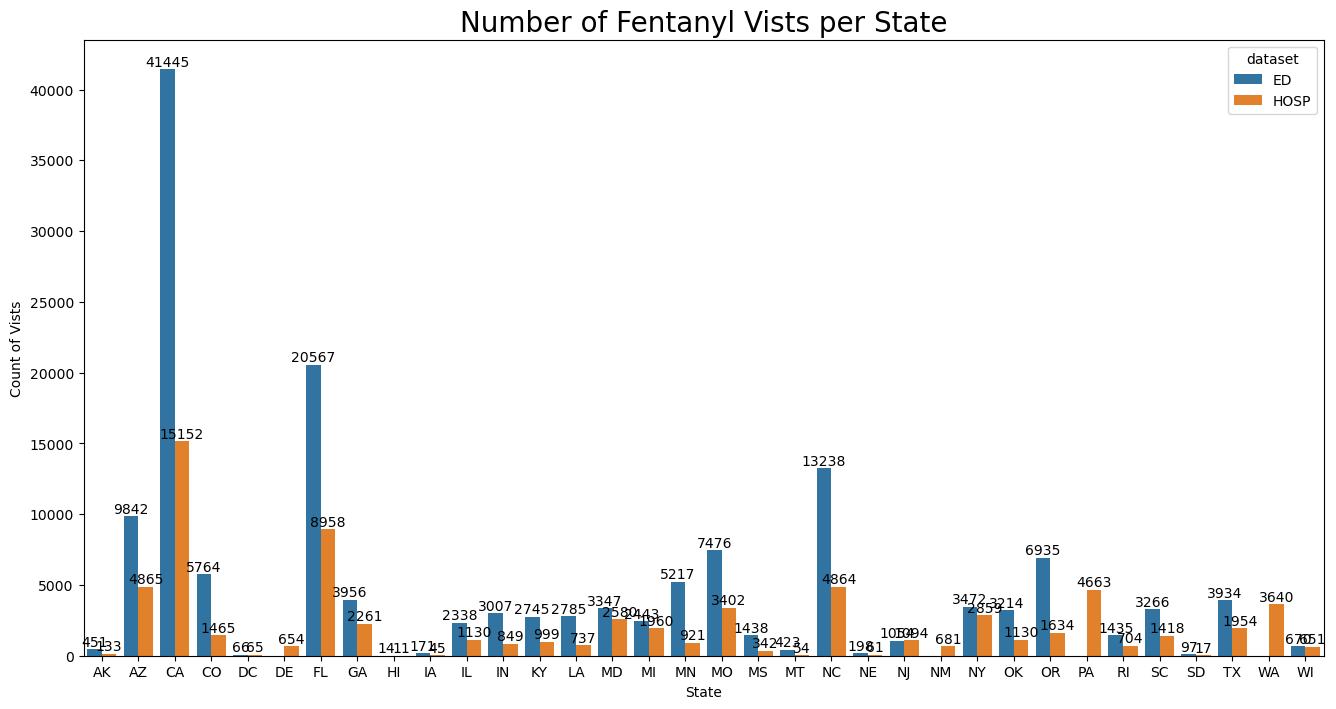

In [83]:
plt.figure(figsize=(16, 8))

ax= sns.barplot(x='jurisdiction', y= 'count_fentanyl', hue='dataset', data= fentanyl_visits_count)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xlabel('State')
plt.ylabel('Count of Vists')
plt.title('Number of Fentanyl Vists per State', fontsize= 20)


## Count of overdose by year

In [97]:
annual_HOSP_visits = (
    er_hospital_states
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='HOSP']
    .groupby('year')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
annual_HOSP_visits


,year,count_fentanyl,count_cocaine
0,2018,0.0,17258.0
1,2019,0.0,17978.0
2,2020,0.0,16596.0
3,2021,7406.0,17402.0
4,2022,10950.0,17316.0
5,2023,17878.0,18749.0


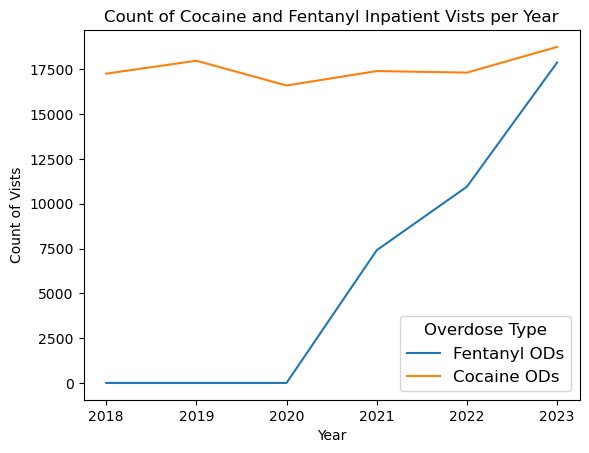

In [99]:
#set x-axis
annual_HOSP_visits= annual_HOSP_visits.set_index('year')
#set y-axis
annual_HOSP_visits.plot(y=['count_fentanyl','count_cocaine'])


plt.xlabel('Year')
plt.ylabel('Count of Vists')
plt.title('Count of Cocaine and Fentanyl Inpatient Vists per Year')
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=12, fontsize=12)



In [16]:
annual_ED_visits = (
    er_hospital_states
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['jurisdiction']!= 'US']
    .loc[er_hospital_states['dataset']=='ED']
    .groupby('year')[['count_fentanyl','count_cocaine']].sum().reset_index()
)
annual_ED_visits


,year,count_fentanyl,count_cocaine
0,2018,0.0,7125.0
1,2019,0.0,6791.0
2,2020,0.0,7034.0
3,2021,18766.0,7973.0
4,2022,24104.0,8430.0
5,2023,31565.0,7599.0


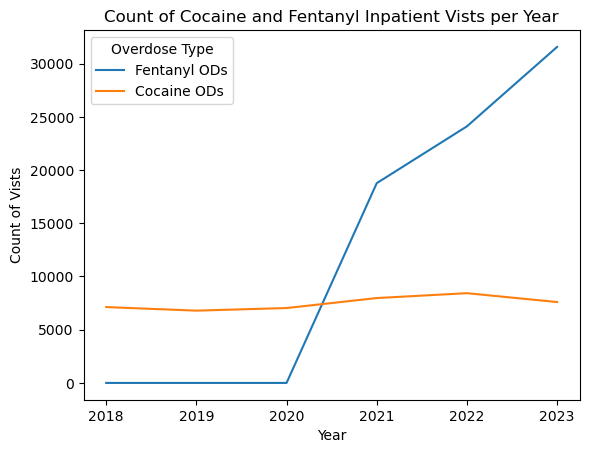

In [17]:
#set x-axis
annual_ED_visits= annual_ED_visits.set_index('year')
#set y-axis
annual_ED_visits.plot(y=['count_fentanyl','count_cocaine'])

plt.xlabel('Year')
plt.ylabel('Count of Vists')
plt.title('Count of Cocaine and Fentanyl Inpatient Vists per Year')
plt.legend((['Fentanyl ODs','Cocaine ODs']), title='Overdose Type', title_fontsize=10, fontsize=10)

#ax = sns.lineplot(x='year', y=['count_fentanyl','count_cocaine'], data= annual_HOSP_visits)

In [139]:
coke_us_ods= (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction'] == 'US']
    .loc[er_hospital_states['month'] == 'all']
    [['year','jurisdiction','dataset','count_cocaine']]
    .groupby(['year'])[['dataset', 'count_cocaine']].sum().reset_index()
)

pop = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction'] == 'US']
    .loc[er_hospital_states['month'] == 'all']
    .loc[er_hospital_states['population']]
)

coke_us_ods['percent'] = coke_us_ods['count_cocaine']

pop_percent_ods = (
        #/coke_us_ods['population']
)
pop_percent_ods

0    24417.0
1    24793.0
2    23666.0
3    25391.0
4    25781.0
5    26369.0
Name: count_cocaine, dtype: float64

In [155]:
pop = (
    er_hospital_states
    .loc[er_hospital_states['jurisdiction'] == 'US']
    .loc[er_hospital_states['month'] == 'all']
    #.loc[er_hospital_states['population']]
    .groupby('year')['population'].value_counts()
)
pop 

year  population
2018  237000000     1
      264000000     1
2019  238000000     1
      265000000     1
2020  240000000     1
      268000000     1
2021  244000000     1
      268000000     1
2022  245000000     1
      269000000     1
2023  246000000     1
      270000000     1
Name: count, dtype: int64